In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [183]:
df=pd.read_csv("/content/data.csv")

In [184]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [185]:
df.dtypes

,0
Company,object
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [186]:
df.isnull().sum()

,0
Company,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [187]:
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [188]:
df['Close'] = df['Close'].str.replace('$', '').astype(float)
df['Open'] = df['Open'].str.replace('$', '').astype(float)
df['High'] = df['High'].str.replace('$', '').astype(float)
df['Low'] = df['Low'].str.replace('$', '').astype(float)


In [189]:
stocks= pd.DataFrame(df,columns=['Date','Company','Open','High','Low','Close','Volume'])
stocks.head()

,Date,Company,Open,High,Low,Close,Volume
0,07/17/2023,AAPL,191.90,194.3200,191.81,193.99,50520160
1,07/14/2023,AAPL,190.23,191.1799,189.63,190.69,41616240
2,07/13/2023,AAPL,190.50,191.1900,189.78,190.54,41342340
3,07-12-2023,AAPL,189.68,191.7000,188.47,189.77,60750250
4,07-11-2023,AAPL,189.16,189.3000,186.60,188.08,46638120


In [190]:
stocks.dtypes

,0
Date,object
Company,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [191]:
def convert_date(date_str):
    try:

        return pd.to_datetime(date_str, format='%m-%d-%Y').strftime('%d/%m/%Y')
    except ValueError:
        return date_str

stocks['Date'] = stocks['Date'].apply(convert_date)

In [192]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [193]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     25160 non-null  datetime64[ns]
 1   Company  25160 non-null  object        
 2   Open     25160 non-null  float64       
 3   High     25160 non-null  float64       
 4   Low      25160 non-null  float64       
 5   Close    25160 non-null  float64       
 6   Volume   25160 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB


In [194]:
stocks['Day'] = stocks['Date'].dt.day
stocks['Month'] = stocks['Date'].dt.month
stocks['Quarter'] = stocks['Date'].dt.quarter
stocks['Year'] = stocks['Date'].dt.year

In [195]:
stocks.set_index('Date', inplace=True)
stocks.head()

,Company,Open,High,Low,Close,Volume,Day,Month,Quarter,Year
Date,,,,,,,,,,
2023-07-17,AAPL,191.90,194.3200,191.81,193.99,50520160,17,7,3,2023
2023-07-14,AAPL,190.23,191.1799,189.63,190.69,41616240,14,7,3,2023
2023-07-13,AAPL,190.50,191.1900,189.78,190.54,41342340,13,7,3,2023
2023-12-07,AAPL,189.68,191.7000,188.47,189.77,60750250,7,12,4,2023
2023-11-07,AAPL,189.16,189.3000,186.60,188.08,46638120,7,11,4,2023


In [196]:
stocks['Company'].value_counts()

,count
Company,
AAPL,2516
SBUX,2516
MSFT,2516
CSCO,2516
QCOM,2516
META,2516
AMZN,2516
TSLA,2516
AMD,2516


In [197]:
stocks_close = stocks.pivot(columns='Company', values='Close')
stocks_close.head()


Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2013-01-08,16.3099,3.81,15.2785,25.891,37.489,31.670,35.5886,65.27,36.740,9.0367
2013-01-10,17.4271,3.86,16.0475,23.240,50.420,33.580,46.3743,67.49,38.580,12.8667
2013-01-11,18.5725,3.31,17.9501,22.565,49.750,35.525,47.0378,69.90,40.185,10.8113
2013-02-08,16.5193,3.80,15.2105,26.190,38.050,31.890,35.1686,66.75,37.115,9.2000
2013-02-10,17.4843,3.90,16.0255,23.320,50.280,33.920,47.2471,67.68,38.595,12.0633


In [198]:
stocks_close.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AAPL,2516.0,70.294163,52.459923,14.9639,28.381875,44.2000,124.771875,193.9900
AMD,2516.0,38.069080,39.991063,1.6200,4.037500,16.5950,76.587500,161.9100
AMZN,2516.0,78.827081,51.854820,14.0465,29.932125,81.0060,115.025000,186.5705
CSCO,2516.0,39.090075,11.089336,20.2400,28.400000,41.5100,47.770000,63.9600
META,2516.0,165.724114,79.822152,25.8810,104.985000,163.0550,202.872500,382.1800
MSFT,2516.0,135.610791,94.808841,31.1520,51.647500,101.6900,223.992500,348.1000
NFLX,2516.0,256.768639,168.759861,34.4714,97.905000,244.6050,366.905000,691.6900
QCOM,2516.0,86.945386,34.979906,42.9600,60.615000,72.9400,116.817500,189.2800
SBUX,2516.0,69.964221,23.795273,33.3050,54.308750,60.5750,88.397500,126.0600


39.090074523052465


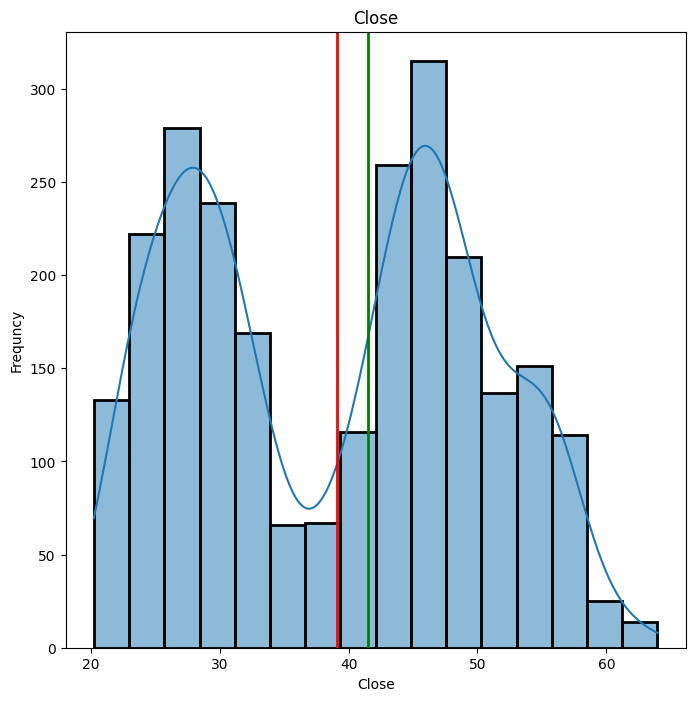

<Figure size 640x480 with 0 Axes>

In [199]:
plt.figure(figsize=(8, 8))

sns.histplot(stocks_close['CSCO'], edgecolor='black', linewidth=2, kde=True)
mean = np.mean(stocks_close['CSCO'])
print(mean)
plt.axvline(mean, color='r', linewidth=2)
plt.axvline(stocks_close['CSCO'].median(), color='g', linewidth=2)
plt.title('Close')
plt.xlabel('Close')
plt.ylabel('Frequncy')
plt.show()
plt.savefig('stock_close_CSCO.png')

165.72411403020666


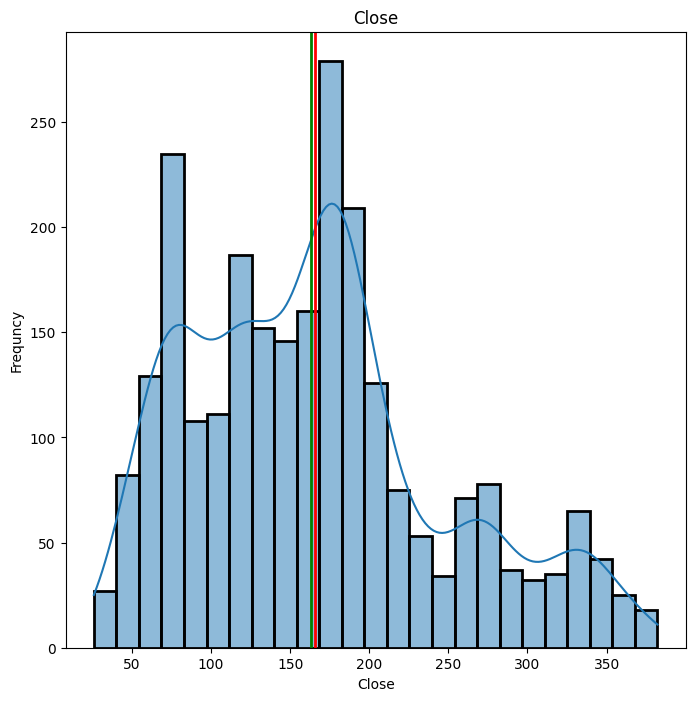

<Figure size 640x480 with 0 Axes>

In [200]:
plt.figure(figsize=(8, 8))

sns.histplot(stocks_close['META'], edgecolor='black', linewidth=2, kde=True)
mean = np.mean(stocks_close['META'])
print(mean)
plt.axvline(mean, color='r', linewidth=2)
plt.axvline(stocks_close['META'].median(), color='g', linewidth=2)
plt.title('Close')
plt.xlabel('Close')
plt.ylabel('Frequncy')
plt.show()
plt.savefig('stock_close_META_.png')

83.26522841812401


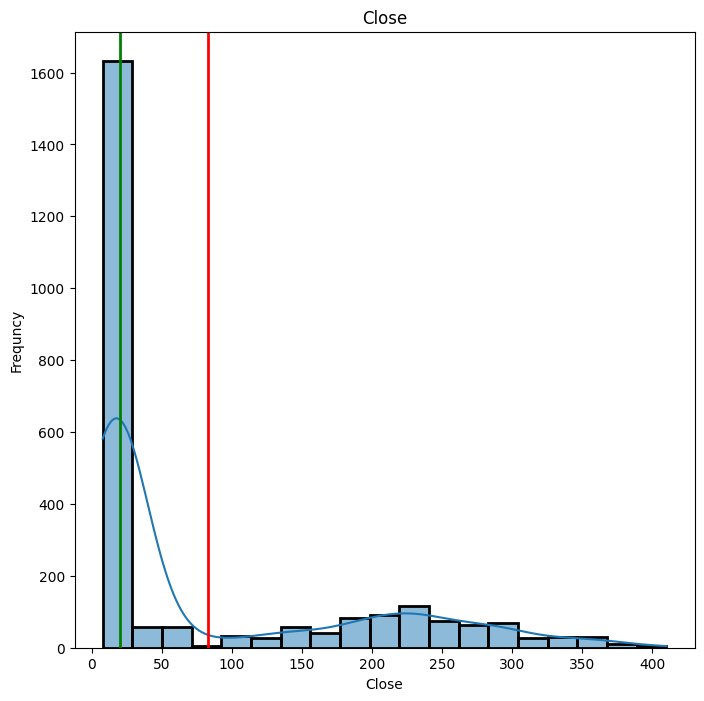

<Figure size 640x480 with 0 Axes>

In [201]:
plt.figure(figsize=(8, 8))

sns.histplot(stocks_close['TSLA'], edgecolor='black', linewidth=2, kde=True)
mean = np.mean(stocks_close['TSLA'])
print(mean)
plt.axvline(mean, color='r', linewidth=2)
plt.axvline(stocks_close['TSLA'].median(), color='g', linewidth=2)
plt.title('Close')
plt.xlabel('Close')
plt.ylabel('Frequncy')
plt.show()
plt.savefig('stock_close_TSLA_.png')

# **look at the prices **

In [202]:
import plotly.express as px
px.line(data_frame=stocks_close, title='Stock prices')
plt.savefig('look_at_the prices')


<Figure size 640x480 with 0 Axes>

In [203]:
norm = stocks_close/stocks_close.iloc[0,:]
norm.head()

Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2013-01-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-10,1.068498,1.013123,1.050332,0.897609,1.344928,1.060309,1.303066,1.034013,1.050082,1.423827
2013-01-11,1.138726,0.868766,1.174860,0.871538,1.327056,1.121724,1.321710,1.070936,1.093767,1.196377
2013-02-08,1.012839,0.997375,0.995549,1.011548,1.014964,1.006947,0.988198,1.022675,1.010207,1.018071
2013-02-10,1.072005,1.023622,1.048892,0.900699,1.341193,1.071045,1.327591,1.036924,1.050490,1.334923


In [204]:
import plotly.express as px
fig = px. line(norm)

fig.update_layout (title='Stock movement observation by normalizing close prices, (Daily Cumulative Return)',
xaxis_title='Date',
yaxis_title= 'Normalized price')
plt.savefig('stock_close_norm.png')


<Figure size 640x480 with 0 Axes>

In [205]:
daily_returns = stocks_close.pct_change()
daily_returns.iloc[0, :] = 0
daily_returns.head()

Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2013-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-10,0.068498,0.013123,0.050332,-0.102391,0.344928,0.060309,0.303066,0.034013,0.050082,0.423827
2013-01-11,0.065725,-0.142487,0.118561,-0.029045,-0.013288,0.057921,0.014307,0.035709,0.041602,-0.159746
2013-02-08,-0.110551,0.148036,-0.152623,0.160647,-0.235176,-0.102322,-0.252333,-0.045064,-0.076397,-0.149039
2013-02-10,0.058417,0.026316,0.053581,-0.109584,0.321419,0.063656,0.343446,0.013933,0.039876,0.311228


In [206]:
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AAPL,2516.0,0.004532,0.082115,-0.441207,-0.013697,0.001849,0.023902,0.474060
AMD,2516.0,0.015526,0.167179,-0.785463,-0.029631,0.001802,0.037525,1.286214
AMZN,2516.0,0.006026,0.100010,-0.565959,-0.014994,0.002779,0.026384,0.711280
CSCO,2516.0,0.002242,0.063400,-0.335069,-0.013183,0.000551,0.015406,0.545500
META,2516.0,0.008312,0.136632,-0.548147,-0.017531,0.002639,0.026688,2.589201
MSFT,2516.0,0.003544,0.070541,-0.349859,-0.011588,0.002770,0.022842,0.356912
NFLX,2516.0,0.010330,0.143091,-0.631047,-0.019475,0.002534,0.033943,2.094070
QCOM,2516.0,0.004854,0.096631,-0.534957,-0.018583,0.000857,0.020126,0.610401
SBUX,2516.0,0.002444,0.062932,-0.346555,-0.011967,0.001661,0.017900,0.479636


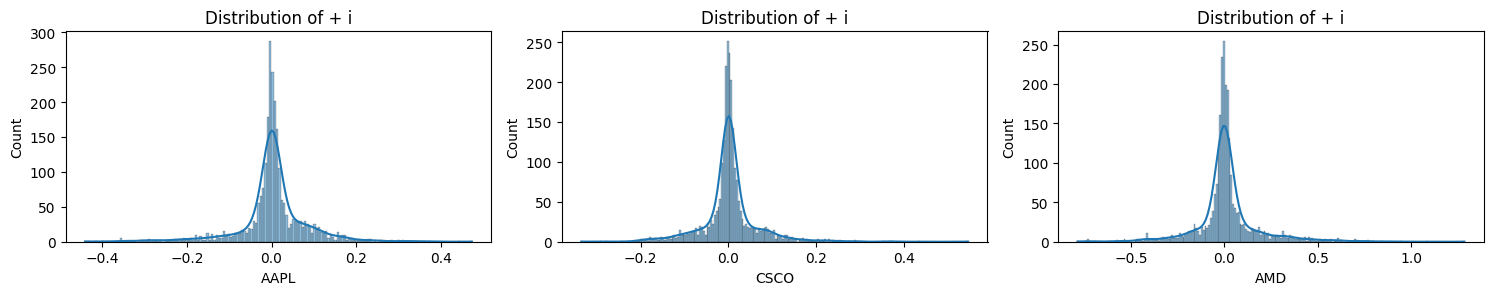

In [207]:
plt.figure(figsize=(20,8))
for e,i in enumerate(daily_returns[['AAPL', 'CSCO', 'AMD']]):
 plt. subplot (3, 4, e+1)
 sns.histplot(daily_returns[i], kde=True)
 plt. title( 'Distribution of + i');
 plt. tight_layout();
 plt.savefig('stock_daily_returns.png')

## cumulative **return** **ratio**

In [208]:
cumulative_returns = stocks_close
for stock in cumulative_returns :
  print('cumulative reten of {} is: {} % '.format(stock,round(((stocks_close.iloc[-1][stock])-1)*100),2))

cumulative reten of AAPL is: 18877 % 
cumulative reten of AMD is: 11358 % 
cumulative reten of AMZN is: 12980 % 
cumulative reten of CSCO is: 4974 % 
cumulative reten of META is: 30834 % 
cumulative reten of MSFT is: 33620 % 
cumulative reten of NFLX is: 44305 % 
cumulative reten of QCOM is: 11768 % 
cumulative reten of SBUX is: 10014 % 
cumulative reten of TSLA is: 27099 % 


In [209]:
print(f'kurtosis of AAPL  ={daily_returns.AAPL .kurtosis()}')

kurtosis of AAPL  =5.872412165072669


In [210]:
print(f'kurtosis of MSFT  ={daily_returns.MSFT.kurtosis()}')

kurtosis of MSFT  =5.186997885062347


In [211]:
print(f'kurtosis of AMZN  ={daily_returns.AMZN.kurtosis()}')

kurtosis of AMZN  =8.896756494096405


In [212]:
print(f'kurtosis of TSLA ={daily_returns.TSLA.kurtosis()}')

kurtosis of TSLA =7.428370927791125


In [213]:
print(f'kurtosis of SBUX ={daily_returns.SBUX.kurtosis()}')

kurtosis of SBUX =8.294603400837042


In [214]:
print(f'kurtosis of META ={daily_returns.META.kurtosis()}')

kurtosis of META =85.64095276117335


In [215]:
print(f'kurtosis of CSCO ={daily_returns.CSCO.kurtosis()}')

kurtosis of CSCO =7.8407922160804215


In [216]:
print(f'kurtosis of NFLX ={daily_returns.NFLX.kurtosis()}')

kurtosis of NFLX =47.232109867839306


In [217]:
print(f'kurtosis of AMD ={daily_returns.AMD.kurtosis()}')

kurtosis of AMD =7.119159544506683


In [218]:
print(f'kurtosis of QCOM ={daily_returns.QCOM.kurtosis()}')

kurtosis of QCOM =7.883126798338452


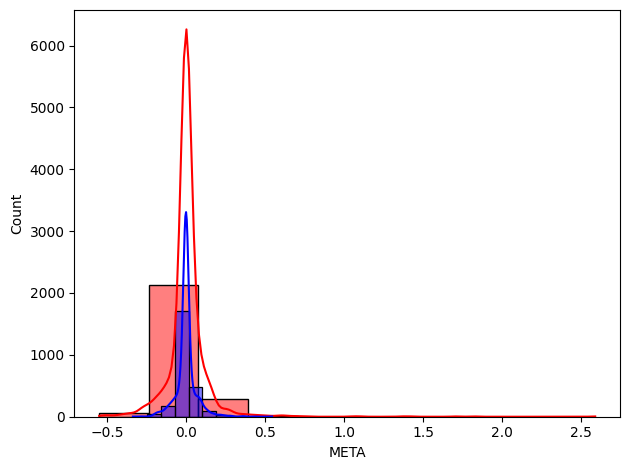

In [219]:
sns.histplot(daily_returns.META, kde=True,bins=10,color='red')
sns.histplot(daily_returns.CSCO, kde=True,bins=10,color='blue')
plt.tight_layout()
plt.savefig('kurtosis.png')
